In [29]:
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [8]:
# SSBM Graph
n = 30
k = 3
A = 0.7
B = 0.1
W = [[A, B, B], [B, A, B], [B, B, A]]

G = nx.Graph()
labels = [0, 1, 2]

for i in range(n):
    label = np.random.choice(labels)
    G.add_node(str(i) + " " + str(label))

nodes = list(G.nodes)
for i in range(n):
    for j in range(i + 1, n, 1):
        node1 = nodes[i]
        node2 = nodes[j]
        label1 = node1.split(" ")[1]
        label2 = node2.split(" ")[1]
        p = W[int(label1)][int(label2)]
        if np.random.random() < p:
            G.add_edge(node1, node2)

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


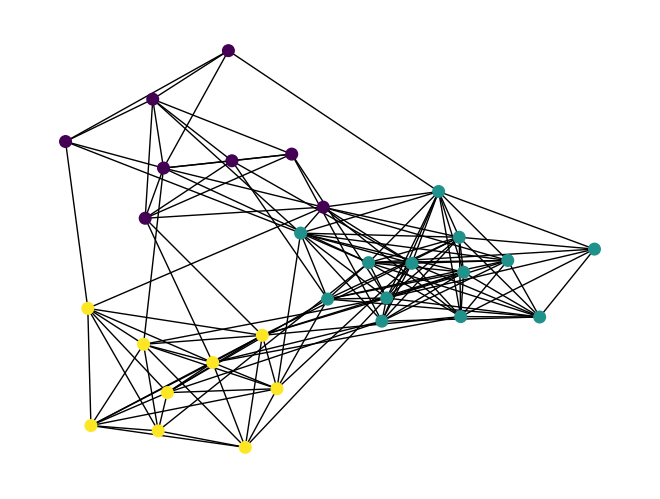

In [15]:
spectral = SpectralClustering(k)
clusters = spectral.fit_predict(nx.to_numpy_array(G))
nx.draw(G, node_color=clusters, node_size=70)

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


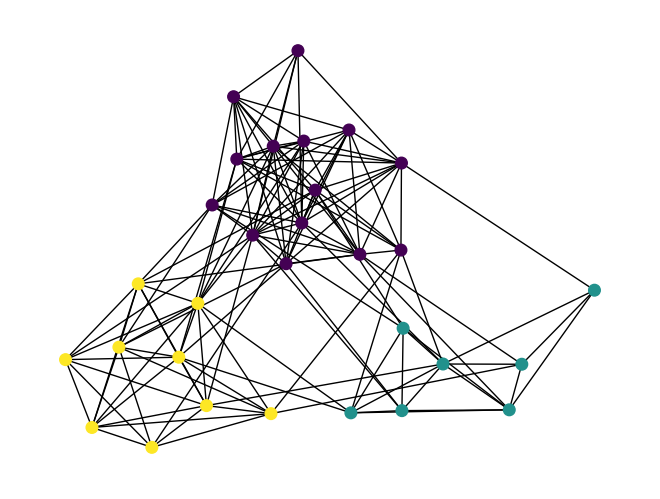

In [16]:
kmeans = KMeans(k)
clusters = kmeans.fit_predict(nx.to_numpy_array(G))
nx.draw(G, node_color=clusters, node_size=70)

There is a slight difference with 2 of the clusters containing differing numbers of nodes, but overall both algorithms capture very similar clusters. Both algorithms seem to capture the SSBM clusters pretty well as well.

In [19]:
circles = make_circles(500, noise=0.01)

/opt/homebrew/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


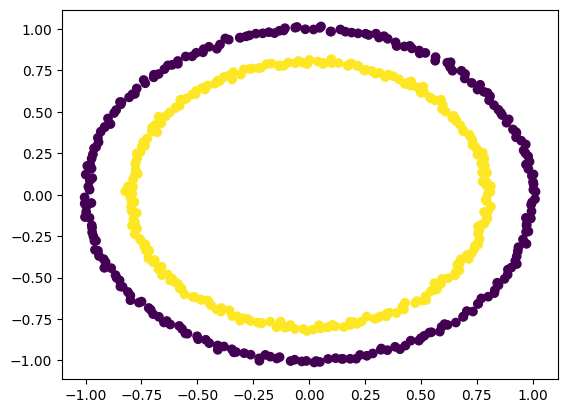

In [34]:
spectral = SpectralClustering(2, affinity="nearest_neighbors")
clusters = spectral.fit_predict(circles[0])
plt.scatter(circles[0][:, 0], circles[0][:, 1], c=clusters)

/opt/homebrew/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


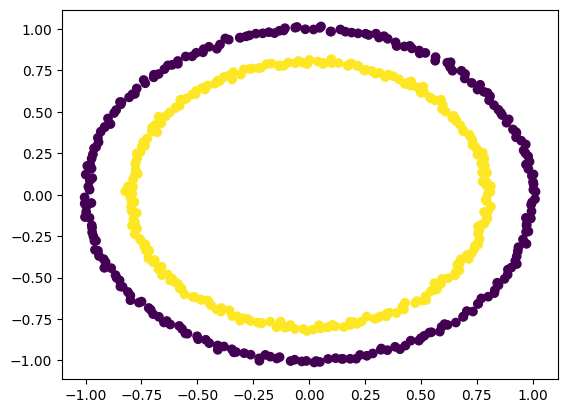

In [37]:
kmeans = KMeans(2)
clusters = spectral.fit_predict(circles[0])
plt.scatter(circles[0][:, 0], circles[0][:, 1], c=clusters)

Both algorithms perform essentially the same, separating the inside vs the outside circles well. 